<a href="https://colab.research.google.com/github/CongSheng/AIfinity2021/blob/main/DataExploration_JX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import datetime
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Cleaning and Processing

In [ ]:
dataDir = "/content/drive/MyDrive/Ebuy/"
salesDf = pd.ExcelFile(dataDir + "Master Data (Sales).xlsx")
purchaseDf = pd.ExcelFile(dataDir + "Master Data (Purchase).xlsx")
salesShop = ['Sales - Outlet 1', 'Sales - Outlet 2', 'Sales - Outlet 3']
purchaseShop = ['Purchase - Outlet 1', 'Purchase - Outlet 2', 'Purchase - Outlet 3'] 
salesDfList = []
purchaseDfList = []
for shop in salesShop:
  salesDfList.append(salesDf.parse(shop))
for shop in purchaseShop:
  purchaseDfList .append(purchaseDf.parse(shop))

for shop in salesDfList:
  shop['date'] = pd.to_datetime(shop['Date of Sale'], format='%Y/%m/%d')

for shop in purchaseDfList:
  shop['date'] = pd.to_datetime(shop['Date of Purchase'], format='%Y/%m/%d')
  shop['qtyPlaced'] = shop['Quantity of Order Placed']
  shop['qtyReceived'] = shop['Quantity of Order Received']
  del shop['Quantity of Order Placed']
  del shop['Quantity of Order Received']
       

Accounting for the ingredients needed for the combos \
Addressing the missing dates within the dataset

In [ ]:
for i,shop in enumerate(salesDfList):
  new_df  =  pd.pivot_table(shop, values='Amount Sold', index='date', columns='SKU').fillna(0)
  columns = ['A001-1','A001-2', 'A002-1','A002-2', 'A003-1','A003-2', 'A003-1','A003-2', 'A004-1','A004-2', 'A005-1','A005-2', 'A006-1','A006-2', 'A007-1','A007-2']
  for col in columns:
    if col not in new_df.columns:
      new_df[col] = 0

  new_df.head()
  new_df['A001'] = new_df['A001-1']*2     + new_df['A001-2']        + new_df['A013']  
  new_df['A002'] = new_df['A002-1']       + new_df['A002-2']*0.5    + new_df['A013']*0.5
  new_df['A003'] = new_df['A003-1']*0.085 + new_df['A003-2']*0.043  + new_df['A013']*0.043
  new_df['A004'] = new_df['A004-1']*0.15  + new_df['A004-2']*0.075  + new_df['A013']*0.075
  new_df['A005'] = new_df['A005-1']       + new_df['A005-2']*0.5    + new_df['A013']*0.5  
  new_df['A006'] = new_df['A006-1']       + new_df['A006-2']*0.5 
  new_df['A007'] = new_df['A007-1']*0.125 + new_df['A007-2']*0.065  + new_df['A014']*0.065   
  new_df['A008'] = new_df['A008-1']                                 + new_df['A014']*0.065
  new_df['A009'] = new_df['A009-1']                                 + new_df['A014']*0.075
  new_df['A010'] = new_df['A010-1']                                 + new_df['A014']*0.05
  new_df['A011'] = new_df['A011-1']                                 + new_df['A014']*0.1
  new_df['A012'] = new_df['A012-1']
  del new_df['A001-1']
  del new_df['A001-2']
  del new_df['A002-1']
  del new_df['A002-2']
  del new_df['A003-1']
  del new_df['A003-2']
  del new_df['A004-1']
  del new_df['A004-2']
  del new_df['A005-1']
  del new_df['A005-2']
  del new_df['A006-1']
  del new_df['A006-2']
  del new_df['A007-1']
  del new_df['A007-2']
  del new_df['A008-1']
  del new_df['A009-1']
  del new_df['A010-1']
  del new_df['A011-1']
  del new_df['A012-1']
  new_df.reset_index(inplace=True)
  new_df.columns.names = ['']
  missingDates = pd.date_range(start = '2018-01-01', end = '2020-12-31' ).difference(new_df['date'])
  new_df.set_index('date', inplace = True) 
  for date in missingDates:  
    new_df.loc[pd.to_datetime(date)] = 0
  new_df = new_df.sort_index()
  new_df = new_df.reset_index()
  salesDfList[i] = new_df


In [ ]:
for i,shop in enumerate(purchaseDfList):
  new_df  =  pd.pivot_table(shop, values=['qtyPlaced','qtyReceived'], index='date', columns='SKU').fillna(0) 
  new_df.reset_index(inplace=True)
  new_df.columns.names = ['','']
  missingDates = pd.date_range(start = '2018-01-01', end = '2020-12-31' ).difference(new_df['date'])
  new_df.set_index('date', inplace = True) 
  for date in missingDates:  
    new_df.loc[pd.to_datetime(date)] = 0
  new_df = new_df.sort_index()
  new_df = new_df.reset_index()
  purchaseDfList[i] = new_df

Creat a dictionary for the shops and further subdividing them into sales and purchases

In [ ]:
shops = {}
for i in range(3):
  overallList = []
  for j in range(1,13): # 1 to 12
    if(j >= 10): item = 'A0'+str(j)
    else: item = 'A00'+str(j)
    #data = [salesDfList[i]['date'],purchaseDfList[i]['qtyPlaced'][item],salesDfList[i][item],purchaseDfList[i]['qtyReceived'][item]]
    #headers = ["date","placed","sales","received"]
    data = [salesDfList[i]['date'],purchaseDfList[i]['qtyPlaced'][item],salesDfList[i][item]]
    headers = ["date","placed","sales"]
    df = pd.concat(data, axis=1, keys=headers)
    #df = df.set_index('date')
    overallList.append(df)
  shops['shop ' + str(i+1)] = overallList

print(shops['shop 1'][0])

           date  placed  sales
0    2018-01-01   120.0   98.0
1    2018-01-02    80.0   43.0
2    2018-01-03    50.0   51.0
3    2018-01-04    30.0   40.0
4    2018-01-05   100.0  101.0
...         ...     ...    ...
1091 2020-12-27     0.0   31.0
1092 2020-12-28     0.0   49.0
1093 2020-12-29     0.0   41.0
1094 2020-12-30     0.0   42.0
1095 2020-12-31     0.0   97.0

[1096 rows x 3 columns]


In [ ]:
from google.colab import files

compression_opts = dict(method='zip',
                        archive_name='out.csv') 
for i,shop in enumerate(purchaseDfList):
  new_df  =  pd.pivot_table(shop, values=['qtyPlaced','qtyReceived'], index='date', columns='SKU').fillna(0) 
  new_df.reset_index(inplace=True)
  new_df.columns.names = ['','']
  missingDates = pd.date_range(start = '2018-01-01', end = '2020-12-31' ).difference(new_df['date'])
  new_df.set_index('date', inplace = True) 
  for date in missingDates:  
    new_df.loc[pd.to_datetime(date)] = 0
  new_df = new_df.sort_index()
  new_df = new_df.reset_index()
  purchaseDfList[i] = new_df
  
  new_df.to_csv('out.zip', index=False,
            compression=compression_opts) 
  files.download('out.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(shops['shop 1'][2])

           date  placed  sales
0    2018-01-01     1.5  1.537
1    2018-01-02     1.5  0.556
2    2018-01-03     1.0  0.471
3    2018-01-04     1.0  0.513
4    2018-01-05     1.5  1.325
...         ...     ...    ...
1091 2020-12-27     0.0  0.342
1092 2020-12-28     0.0  0.301
1093 2020-12-29     0.0  0.386
1094 2020-12-30     0.0  0.687
1095 2020-12-31     0.0  1.029

[1096 rows x 3 columns]


#RNN

In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import SimpleRNN
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [ ]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i]) #changed here, original doesnt have 1
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i]) #changed here, original doesnt have 1
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
    model.add(SimpleRNN(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    #print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat
  

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Qty')
    plt.title("Prediction using Multivatiate-RNN")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Loss Plot')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

#Build

Checking if there are any errors in the dict

In [ ]:
current = shops['shop 1'][0] #shop1, A001
print(current)
print(current.loc[1008,:].values)

           date  placed  sales
0    2018-01-01   120.0   98.0
1    2018-01-02    80.0   43.0
2    2018-01-03    50.0   51.0
3    2018-01-04    30.0   40.0
4    2018-01-05   100.0  101.0
...         ...     ...    ...
1091 2020-12-27     0.0   31.0
1092 2020-12-28     0.0   49.0
1093 2020-12-29     0.0   41.0
1094 2020-12-30     0.0   42.0
1095 2020-12-31     0.0   97.0

[1096 rows x 3 columns]
[Timestamp('2020-10-05 00:00:00') 20.0 14.0]


Model evaluation during training and testing

In [ ]:
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,1)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
trainPredict = np.zeros(shape=(len(predicted), 2) )
# put the predicted values in the right field
trainPredict[:,0] = predicted[:,0]
result = sc.inverse_transform(trainPredict)[:,0]
print(result)

Helper Functions

In [ ]:
# Train Val Test Split
def split(current):
  train_data = current.loc[0:730, current.columns != 'date'] # to 2020/01/01

  val_data = current.loc[731:1064, current.columns != 'date'] # to 2020/11/31

  generate_data = current.loc[1065:, current.columns != 'date']
  generate_data = generate_data[['sales','placed']]
   
  return train_data, val_data, generate_data
#print(train_data.shape,val_data.shape,test_data.shape)

In [ ]:
# Normalisation
def normalise(train_data, val_data, generate_data):
  sc = MinMaxScaler()
  train = sc.fit_transform(train_data)
  val = sc.transform(val_data)
  generate = sc.transform(generate_data) #ok even if first column is all 0, as it normalises based on column
  return sc, train, val, generate
#print(train.shape,val.shape,test.shape)

Actual training and data generation

In [ ]:
timesteps = 15
hl = [64,50,40,35]
lr = 1e-3
batch_size = 8
num_epochs = 200
overall = {}

for i in range(1,2):#for each shop
  shop = 'shop ' + str(i)
  shopData = []
  for j in range(10,11):
    current = shops[shop][j] #shop1, A001
    train_data, val_data, generate_data = split(current)
    sc, train, val, generate = normalise(train_data, val_data, generate_data)
    model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)

    #Generating part
    generateSet =  np.array([val[-timesteps:]])
    result = [] #to be saved and stored in the new excel sheet
    for k in range(31): #create a loop
      row = generate[k] 
      predicted = model.predict(generateSet)
      row[0] = max(predicted,0)
      row = np.array([[row]])
      result.append([predicted[0][0]])
      generateSet = np.delete(generateSet, (0), axis=1) 
      generateSet = np.insert(generateSet, (timesteps-1), row, axis = 1)
      
    predicted = np.array(result)
    trainPredict = np.zeros(shape=(len(predicted), 2) )
    # put the predicted values in the right field
    trainPredict[:,0] = predicted[:,0]
    result = sc.inverse_transform(trainPredict)[:,0]     
    result = np.maximum(result,0)
    print("NUM " + str(j), result)
    #mse, rmse, r2_value,true,predicted = evaluate_model(model,generate,1) 
    shopData.append(result)
    model.save(shop + ' A0' + str(j))
  overall[shop] = shopData
  
  print(overall)

Epoch 00081: early stopping
NUM 10 [5.59126273 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273
 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273
 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273
 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273
 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273 5.59126273
 5.59126273]
INFO:tensorflow:Assets written to: shop 1 A010/assets
{'shop 1': [array([5.59126273, 5.59126273, 5.59126273, 5.59126273, 5.59126273,
       5.59126273, 5.59126273, 5.59126273, 5.59126273, 5.59126273,
       5.59126273, 5.59126273, 5.59126273, 5.59126273, 5.59126273,
       5.59126273, 5.59126273, 5.59126273, 5.59126273, 5.59126273,
       5.59126273, 5.59126273, 5.59126273, 5.59126273, 5.59126273,
       5.59126273, 5.59126273, 5.59126273, 5.59126273, 5.59126273,
       5.59126273])]}


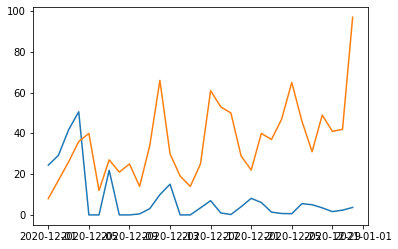

In [ ]:
current = shops['shop 1'][0]
plt.plot(current['date'].loc[1065:],overall['shop 1'][0])
plt.plot(current['date'].loc[1065:],current['sales'].loc[1065:])

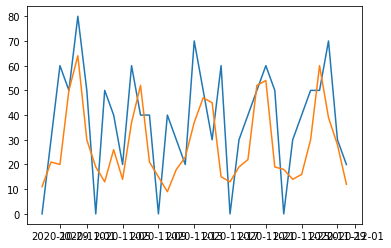

In [ ]:
current = shops['shop 1'][0]
plt.plot(current['date'].loc[1030:1064],current['placed'].loc[1030:1064])
plt.plot(current['date'].loc[1030:1064],current['sales'].loc[1030:1064])

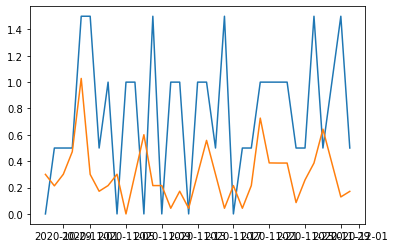

In [ ]:
current = shops['shop 1'][2]
plt.plot(current['date'].loc[1030:1064],current['placed'].loc[1030:1064])
plt.plot(current['date'].loc[1030:1064],current['sales'].loc[1030:1064])

In [ ]:
shops[shop][2]

,date,placed,sales
0,2018-01-01,1.5,1.537
1,2018-01-02,1.5,0.556
2,2018-01-03,1.0,0.471
3,2018-01-04,1.0,0.513
4,2018-01-05,1.5,1.325
...,...,...,...
1091,2020-12-27,0.0,0.342
1092,2020-12-28,0.0,0.301
1093,2020-12-29,0.0,0.386
1094,2020-12-30,0.0,0.687


In [ ]:
from google.colab import files
import json

x = json.dumps (shops)
y = x.encode('utf-8')
with open('example.txt', 'w') as f:
  f.write(str(y))

files.download('example.txt')

TypeError: ignored